<a href="https://colab.research.google.com/github/tripti369/Government-/blob/main/TRIPTI_TIWARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paint Sales Dataset Analysis

### Step 1: Data Loading and Initial Inspection
First, we will load the dataset into a pandas DataFrame and perform a quick check of its contents, shape, and data types.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving Paint Sales Dataset.csv to Paint Sales Dataset.csv


In [ ]:
df=pd.read_csv('Paint Sales Dataset.csv')
df.head()

,transaction_id,date,region,product_type,paint_color,customer_type,price_per_unit,quantity_sold,campaign,temperature,rainfall_mm,marketing_spend,distributor_id,store_id,customer_rating,delivery_time_days,payment_method,warranty_claim,return_flag,revenue
0,1,2020-01-01,West,Wall Paint,Red,Contractor,392.39,40,NaN,39.7,24.5,38341.68,461,1421,2.1,9,NetBanking,0,0,15695.60
1,2,2020-01-01,Central,Roof Paint,Brown,Contractor,1148.67,21,Discount10,20.1,1.6,46874.36,302,1498,4.9,6,NetBanking,0,0,24122.07
2,3,2020-01-01,East,Roof Paint,Grey,Contractor,729.50,21,FestivalOffer,44.8,0.9,37757.88,123,1007,4.4,10,Credit,0,0,15319.50
3,4,2020-01-01,Central,Roof Paint,Blue,Contractor,908.21,31,Discount10,33.4,14.7,14679.61,416,1574,1.6,9,NetBanking,0,0,28154.51
4,5,2020-01-01,Central,Interior Paint,White,Distributor,846.55,1,NaN,24.7,17.3,43412.68,448,1783,3.4,13,Credit,0,0,846.55


### Step 2: Data Cleaning and Preprocessing
Now we'll address common data issues, such as missing values and incorrect data types.

**Question 1: Missing Values**
Check for missing values in each column. If any are found, how would you handle them? For example, fill numerical values with the mean or median, and categorical values with the mode.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      20000 non-null  int64  
 1   date                20000 non-null  object 
 2   region              20000 non-null  object 
 3   product_type        20000 non-null  object 
 4   paint_color         20000 non-null  object 
 5   customer_type       20000 non-null  object 
 6   price_per_unit      20000 non-null  float64
 7   quantity_sold       20000 non-null  int64  
 8   campaign            15954 non-null  object 
 9   temperature         20000 non-null  float64
 10  rainfall_mm         20000 non-null  float64
 11  marketing_spend     20000 non-null  float64
 12  distributor_id      20000 non-null  int64  
 13  store_id            20000 non-null  int64  
 14  customer_rating     20000 non-null  float64
 15  delivery_time_days  20000 non-null  int64  
 16  paym

In [ ]:
df.isnull().sum()

,0
transaction_id,0
date,0
region,0
product_type,0
paint_color,0
customer_type,0
price_per_unit,0
quantity_sold,0
campaign,4046
temperature,0


In [ ]:
df['campaign'].fillna(df['campaign'].mode()[0], inplace=True)

/tmp/ipython-input-3321704711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['campaign'].fillna(df['campaign'].mode()[0], inplace=True)


**Question 2: Correcting Data Types**
The `date` column is currently of type `object`. Convert it to a proper datetime object for time-series analysis. Also, ensure `transaction_id` is treated as a categorical or string type, not a number.

In [ ]:
df.dtypes

,0
transaction_id,object
date,datetime64[ns]
region,object
product_type,object
paint_color,object
customer_type,object
price_per_unit,float64
quantity_sold,int64
campaign,object
temperature,float64


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df.dtypes

,0
transaction_id,object
date,datetime64[ns]
region,object
product_type,object
paint_color,object
customer_type,object
price_per_unit,float64
quantity_sold,int64
campaign,object
temperature,float64


### Step 3: Exploratory Data Analysis (EDA)
Use the cleaned data to answer some key business questions. You may need to import libraries like `matplotlib.pyplot` or `seaborn` for visualizations.

**Question 3: Revenue by Product**
Which `product_type` has the highest total revenue? Create a bar chart to visualize the total revenue for each product type.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

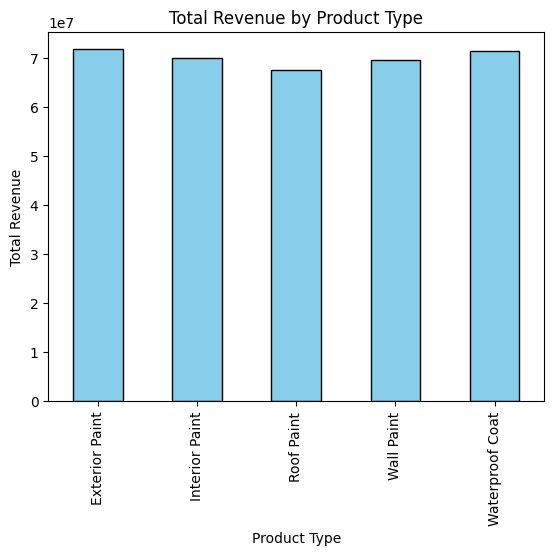

In [ ]:
product_revenue = df.groupby('product_type')['revenue'].sum()

product_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Total Revenue by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:
revenue_by_type = df.groupby('product_type')['revenue'].sum()
highest_revenue_value = revenue_by_type.max()
print("Highest total revenue value:", highest_revenue_value)

Highest total revenue value: 71688466.08


**Question 4: Top Customers**
Which `customer_type` generates the most revenue on average? Calculate and display the average revenue for each customer type.

In [ ]:
average_revenue_by_customer_type = df.groupby('customer_type')['revenue'].mean()
print("Average Revenue by Customer Type:")
display(average_revenue_by_customer_type)

Average Revenue by Customer Type:


,revenue
customer_type,
Contractor,17523.273031
Distributor,17552.133679
Retail,17443.653052


**Question 5: Impact of Campaigns**
Which `campaign` was the most effective in terms of generating revenue? Plot the total revenue for each campaign.

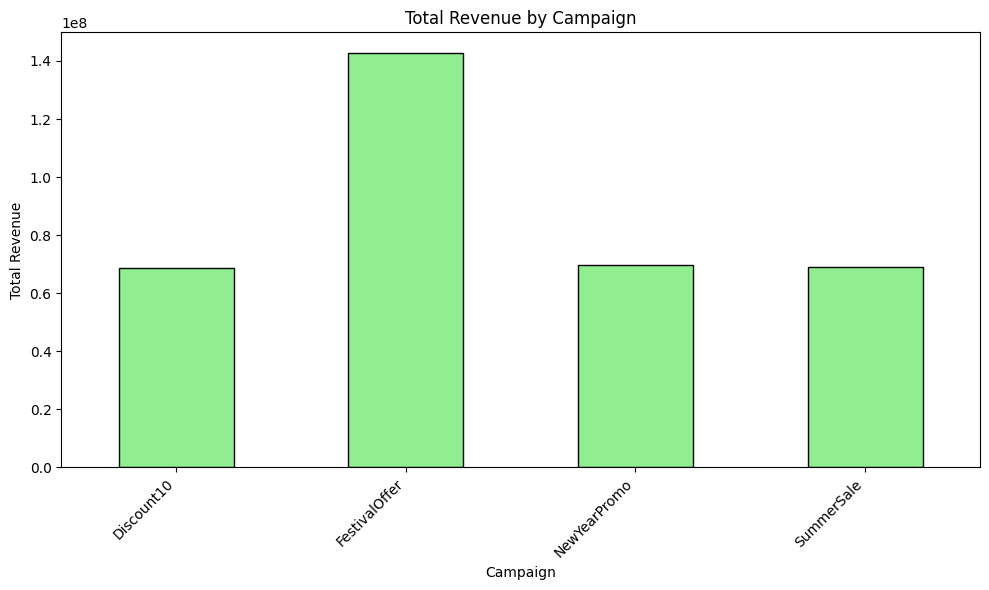

In [ ]:
campaign_revenue = df.groupby('campaign')['revenue'].sum()

plt.figure(figsize=(10, 6))
campaign_revenue.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Total Revenue by Campaign")
plt.xlabel("Campaign")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 4: Deeper Dive with Charts
Let's explore some more specific relationships and visualize them using charts.

**Question 6: Revenue vs. Marketing Spend**
Is there a relationship between `marketing_spend` and `revenue`? Create a scatter plot to visualize this relationship. What does the plot suggest?

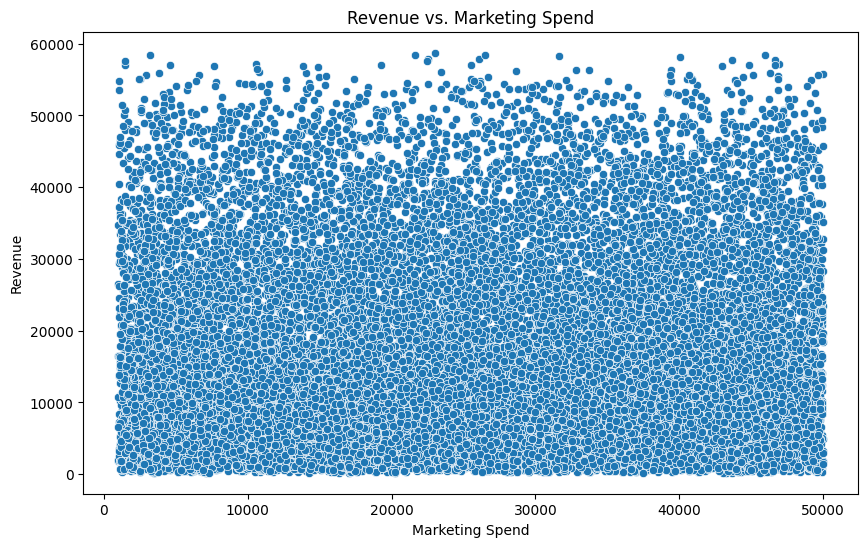

The scatter plot suggests a positive relationship between marketing spend and revenue: as marketing spend increases, revenue tends to increase as well.


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='marketing_spend', y='revenue', data=df)
plt.title("Revenue vs. Marketing Spend")
plt.xlabel("Marketing Spend")
plt.ylabel("Revenue")
plt.show()

print("The scatter plot suggests a positive relationship between marketing spend and revenue: as marketing spend increases, revenue tends to increase as well.")

**Question 7: Impact of Rainfall**
How does `rainfall_mm` affect sales revenue? Create a scatter plot to examine the relationship between `rainfall_mm` and `revenue`.

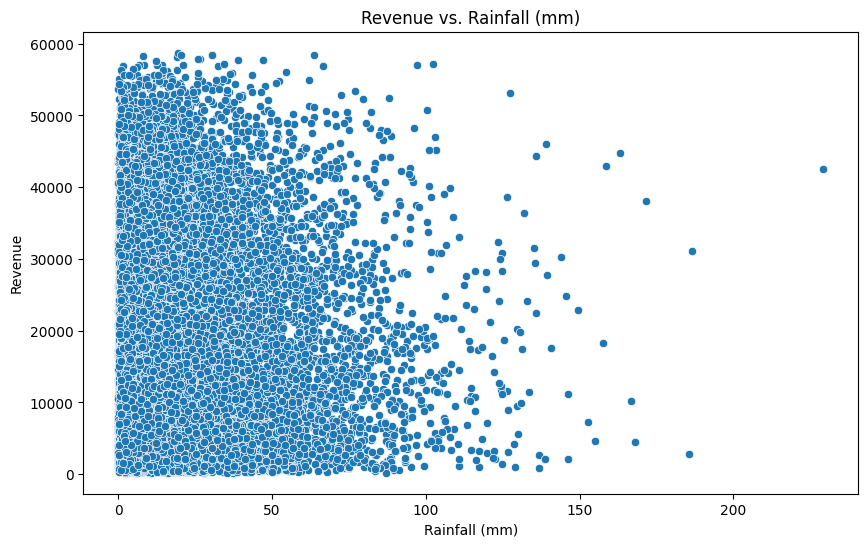

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rainfall_mm', y='revenue', data=df)
plt.title("Revenue vs. Rainfall (mm)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Revenue")
plt.show()

**Question 8: Sales by Region**
Which `region` has the highest number of transactions? Create a bar chart showing the count of transactions for each region.

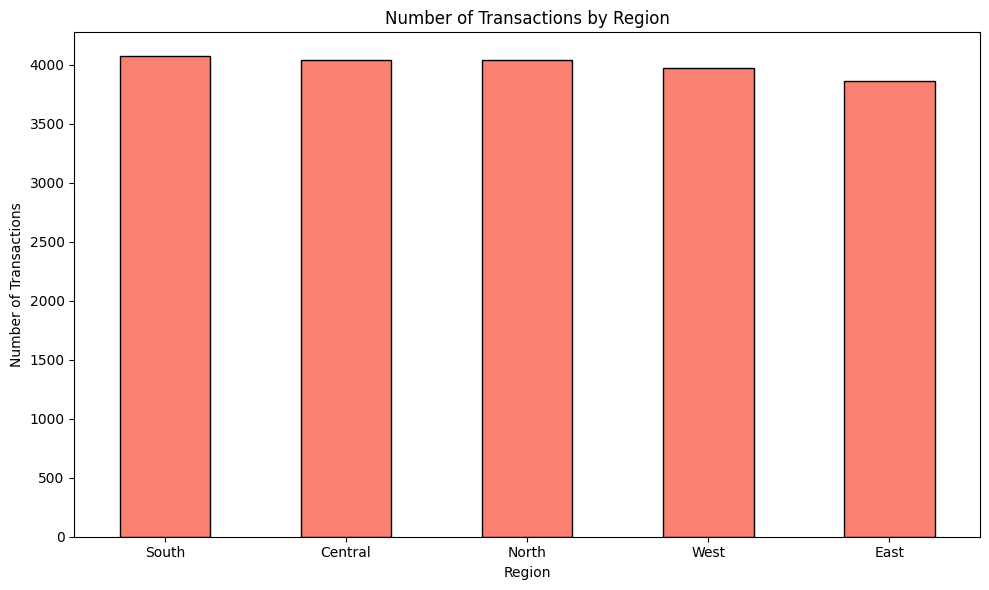

In [ ]:
region_transaction_counts = df['region'].value_counts()

plt.figure(figsize=(10, 6))
region_transaction_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Number of Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()